<div style="background-color:#B1D7CF; color:#ffffff; border: 1px solid #B1D7CF; padding:5px; border-radius:5px;">
   <font color='#ffffff' size=6 face='Verdana'>Activity 3: Portfolio Optimization
</font>
</div>

<font color='#85A8AC' size=3 face='Tahoma'></font>

<font color='#85A8AC' size=3 face='Tahoma'>Paulina Gomez Heredia   |    Marian Sedano Paz</font>
***

<img style="float: left; margin: 30px 15px 15px 15px;" src="https://oci02.img.iteso.mx/Identidades-De-Instancia/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg" width="400" height="600" /> 
    
    
## <font color='navy'> Optimización de Programas de Inversión
    
### <font color='navy'> Tarea. Optimización Lagrangiana de Portafolios

Profesor: Sean Nicolás González Vázquez
    

### Objetivo: Aplicar lo aprendido en clase para calcular, optimizar y graficar los portafolios eficientes en Media Varianza para un Portafolio de Inversión dado.

## <font color='#85A8AC' size=5 face='Tahoma'>Step 1: Cálculo Manual</font>


<font size=4  face='Calibri Light'>Con el problema de optimización planteado para la frontera eficiente de portafolios en la última diapositiva de la presentación, **realiza la derivación analítica de la frontera**, utilizando el método de lagrange. Presenta tus resultados en formato latex.</font>

<font size=4  face='Calibri Light'>*Hint:* Dado que tendrás dos restricciones de igualdad, es recomendable transformar el problema a su forma matricial, esto lo deberás de realizar después de derivar el lagrangiano e igualar las restricciones a cero. El resultado correcto es el siguiente.</font>

$$w^*_{frontier} = \Sigma^{-1} R [R^T \Sigma^{-1} R]^{-1} P$$

<font size=4  face='Calibri Light'>donde $R_{nx2}=\begin{bmatrix} \mu & \overrightarrow{1}\end{bmatrix}$ y $P_{2x1}=\begin{bmatrix} \mu_p \\ 1 \end{bmatrix}$ y $\Sigma^{-1}_{nxn}$ es la inversa de la matriz cuadrada de varianza-covarianza</font>

$\hspace{0.5cm}$

<font size=3  face='Calibri Light'>Dada la función objetivo:</font>

$$min _w \sigma_p^2\ =w^T \Sigma w$$

<font size=3  face='Calibri Light'>y las restricciones:</font>

$$w^T \mathbf{1}=1$$

$$w^T \mu=\mu_p$$

<font size=3  face='Calibri Light'>Donde:</font>

- $w$ : vector de pesos
- $μ$ : vector de retornos 
  

### <font size=4  face='Calibri Light'>**Método de Lagrange**</font>

$$w^*=\Sigma^{-1} R\left[R^T \Sigma^{-1} R\right]^{-1} P$$



$$L=f(x)+\lambda(restriccion)$$

$$L\left(w, \lambda_1, \lambda_2\right)=w^T \Sigma w+\lambda_1\left(1-w^T \mathbf{1}\right)+\lambda_2\left(\mu_p-w^T \mu\right)$$

$$\begin{gathered}\frac{\partial L}{\partial w}=2 \Sigma w-\lambda_1 \mathbf{1}-\lambda_2 \mu \\ \frac{\partial L}{\partial \lambda_1}=1-w^T \mathbf{1} \\ \frac{\partial L}{\partial \lambda_2}=\mu_p-w^T \mu \\ 2 \Sigma w-\lambda_1 \mathbf{1}-\lambda_2 \mu=0 \\ \Sigma w=\frac{\lambda_1}{2} \mathbf{1}+\frac{\lambda_2}{2} \mu \\ w=\frac{\lambda_1}{2} \Sigma^{-1} \mathbf{1}+\frac{\lambda_2}{2} \Sigma^{-1} \mu\end{gathered}$$

$$R=[\mu, \mathbf{1}] \quad $$
$$P=\left[\begin{array}{c}\mu_p \\ 1\end{array}\right] \quad$$

$$R^T \Sigma^{-1} w=P$$

$$R^T \Sigma^{-1} w=\left(R^T \Sigma^{-1} R\right)\left[\begin{array}{l}\lambda_1 / 2 \\ \lambda_2 / 2\end{array}\right]$$

$$
\Sigma^{-1} R
$$
;.
$$
R^T \Sigma^{-1} R
$$
$$
\begin{gathered}
\left(R^T \Sigma^{-1} R\right)^{-1} \\
\left(R^T \Sigma^{-1} R\right)^{-1} P
\end{gathered}
$$
$$
w^*=\Sigma^{-1} R\left(R^T \Sigma^{-1} R\right)^{-1} P
$$

## <font color='#85A8AC' size=5 face='Tahoma'>Step 2: Comprobación de Resultados Min Var y Max Sharpe (30%)</font>


+ <font size=4  face='Calibri Light'>Descarga el archivo de `data_act3.xlsx` que subí a CANVAS, el cual contiene el histórico de los precios de cierre ajustado para `NVDA` y `AMZN`. Calcula los rendimientos diarios, utilizando el cambio porcentual. A posteriori, calcula el rendimiento esperado y la matriz de covarianza-varianza de los rendimientos diarios. Durante el ejercicio asume una tasa libre de riesgo ($r_f$) del $5\%$.


+ <font size=4  face='Calibri Light'>Con la información obtenida, calcula los pesos eficientes en mínima varianza y máximo de sharpe con la solución analítica obtenida en clase:

$$w_{min var} = \frac{\Sigma^{-1} \overrightarrow{1}}{\overrightarrow{1^T} \Sigma^{-1} \overrightarrow{1}}$$

$$w_{max sharpe} = \frac{\Sigma^{-1} (\mu - rf \overrightarrow{1})}{\overrightarrow{1^T} \Sigma^{-1} (\mu - rf \overrightarrow{1})}$$



In [10]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [11]:
# risk free rate, de anual a diaria
rf = 0.05/252

In [12]:
data = pd.read_excel('data_act3.xlsx')  
returns = data[['NVIDIA', 'AMAZON']].pct_change()
returns = returns.dropna()

returns.head()

,NVIDIA,AMAZON
1,-0.004556,-0.005564
2,-0.007267,0.009676
3,0.007918,0.004632
4,0.004978,-0.007954
5,0.008298,0.003201


In [13]:
media = returns.mean()
media

NVIDIA    0.002965
AMAZON    0.000759
dtype: float64

In [14]:
matriz_covarianza = returns.cov()
matriz_covarianza

,NVIDIA,AMAZON
NVIDIA,0.001011,0.000002
AMAZON,0.000002,0.000516


In [15]:
# Función para pesos de mínima varianza
def pesos_minima_varianza(matriz_covarianza):
    """
    Calcula los pesos de mínima varianza para un portafolio
        - parámetro matriz_covarianza: Matriz de covarianza de los retornos de los activos
        - regresa: vector de pesos de mínima varianza
    """
    ones = np.ones(len(matriz_covarianza))
    inv_cov = np.linalg.inv(matriz_covarianza)
    denominador = np.dot(ones.T, np.dot(inv_cov, ones))
    w_minvar = np.dot(inv_cov, ones) / denominador
    return w_minvar


# Función para pesos de máximo Sharpe
def pesos_maximo_sharpe(media, matriz_covarianza, rf):
    """
    Calcula los pesos de máximo ratio de Sharpe para un portafolio
        - parámetro media: Vector de retornos esperados de los activos
        - parámetro matriz_covarianza: Matriz de covarianza de los retornos de los activos
        - parámetro rf: Tasa libre de riesgo
        - parámetro matriz_covarianza: Matriz de covarianza de los retornos de los activos
        - regresa: vector de pesos de máximo ratio de Sharpe
    """
    ones = np.ones(len(matriz_covarianza))
    inv_cov = np.linalg.inv(matriz_covarianza)
    excess_returns = media - rf
    denominador = np.dot(ones.T, np.dot(inv_cov, excess_returns))
    w_maxsharpe = np.dot(inv_cov, excess_returns) / denominador
    return w_maxsharpe



In [16]:
resultado_minima_var = pesos_minima_varianza(matriz_covarianza)

resultado_max_sharpe = pesos_maximo_sharpe(media, matriz_covarianza, rf)

<font color='#85A8AC' size=3 face='Tahoma'>Resultado para los pesos usando Mínima Varianza</font>

In [18]:
print("Pesos con Método Mínima Varianza: ",resultado_minima_var)

Pesos con Método Mínima Varianza:  [0.33738018 0.66261982]


<font color='#85A8AC' size=3 face='Tahoma'>Resultado para los pesos usando Máximo Ratio Sharpe</font>

In [20]:
print("Pesos con Método Ratio Sharpe: ",resultado_max_sharpe)

Pesos con Método Ratio Sharpe:  [0.71706322 0.28293678]


+ <font size=4  face='Calibri Light'>Programa dos funciones para optimizar el portafolio en mínima varianza y máximo de sharpe utilizando la librería de `scipy.optimize.minimize`, utiliza las funciones para encontrar los pesos eficientes para el portafolio dado, deberás obtener los mismos resultados que con la solución analítica.

$\hspace{0.5cm}$

In [22]:
# Función 1: varianza del portafolio
def varianza_portafolio(pesos, matriz_covarianza):
    """
    Calcula la varianza del portafolio dado un vector de pesos y una matriz de covarianza.
    """
    return np.dot(pesos.T, np.dot(matriz_covarianza, pesos))

# Función 2: ratio Sharpe
def ratio_sharpe(pesos, media, matriz_covarianza, rf):
    """
    Calcula el ratio de Sharpe para un portafolio dado un vector de pesos, 
    un vector de rendimientos esperados, una matriz de covarianza y la tasa libre de riesgo.
    """
    rendimientos_portafolio = np.dot(pesos, media)
    vol_portafolio = np.sqrt(np.dot(pesos.T, np.dot(matriz_covarianza, pesos)))
    sharpe_ratio = (rf - rendimientos_portafolio) / vol_portafolio
    return sharpe_ratio


In [46]:
# argumentos iniciales para minimizar
limites = [(0, 1)] * len(matriz_covarianza) # entre 0 y 1
restricciones = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}) # restricciones

pesos_i = np.random.dirichlet(np.ones(len(matriz_covarianza)), size=1)[0] # vector de pesos random para iniciar suma = 1

result_minvar_n = minimize(varianza_portafolio, pesos_i, args=(matriz_covarianza), method='SLSQP', bounds=limites, constraints=restricciones)


pesos_minima_var_n = result_minvar_n.x
print(pesos_minima_var_n)


[0.33738018 0.66261982]


In [50]:
# Optimización de máximo Sharpe
result_maxsharpe_n = minimize(ratio_sharpe, pesos_i, args=(media, matriz_covarianza, rf), method='SLSQP', bounds=limites, constraints=restricciones)

print(result_maxsharpe_n.x)

[0.71728175 0.28271825]


<font size=4  face='Calibri Light'>Obtenemos mismos resultados

In [52]:
print("Mínima varianza analítico:  ", resultado_minima_var)
print("Mínima varianza numérico:  ", pesos_minima_var_n)
print("Sharpe analítico:  ", resultado_max_sharpe)
print("Sharpe numérico:  ", result_maxsharpe_n.x)


Mínima varianza analítico:   [0.33738018 0.66261982]
Mínima varianza numérico:   [0.33738018 0.66261982]
Sharpe analítico:   [0.71706322 0.28293678]
Sharpe numérico:   [0.71728175 0.28271825]


## <font color='#85A8AC' size=5 face='Tahoma'>Step 3: Gráfica de Frontera Eficiente en Media Varianza (40%)</font>


Con los dos puntos anteriores, gráfica la frontera eficiente analítica para el portafolio dado, la gráfica deberá contener los siguientes elementos:

+ Hipérbole de Markowitz (*"Markowitz Bullet"*)  


+ Coordenadas de los activos individuales según su volatilidad y rendimiento.


+ Coordenadas de los portafolios eficientes en mínima varianza y máximo de sharpe


+ Hipérbole de la Frontera Eficiente de Portafolios.
  


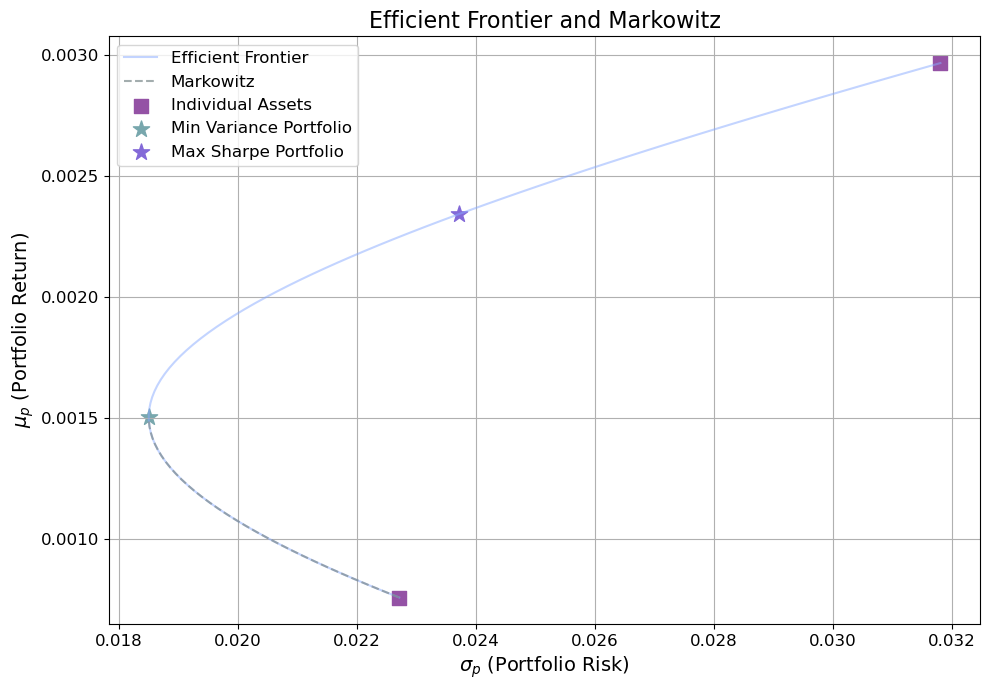

In [90]:
# Crear la gráfica mejorada
plt.figure(figsize=(10, 7))

# Graficar la frontera eficiente (parte superior en azul) y la ineficiente (parte inferior en gris discontinuo)
plt.plot(all_portfolios[:, 1], all_portfolios[:, 0], label='Efficient Frontier', color='#88aaff', alpha=0.5)
plt.plot(all_portfolios[:, 1][all_portfolios[:, 0] <= ret_minvar], 
         all_portfolios[:, 0][all_portfolios[:, 0] <= ret_minvar], color='#7D8A8C', alpha=0.7, linestyle='dashed', label='Markowitz')

# Graficar los activos individuales
plt.scatter(individual_volatilities, individual_returns, marker='s', color='#9452a5', label='Individual Assets', s=100)

# Graficar los portafolios de mínima varianza y máximo Sharpe
plt.scatter(vol_minvar, ret_minvar, marker='*', color='#78A7AD', s=150, label='Min Variance Portfolio')
plt.scatter(vol_maxsharpe, ret_maxsharpe, marker='*', color='#8369D8', s=150, label='Max Sharpe Portfolio')

plt.title('Efficient Frontier and Markowitz', fontsize=16)
plt.xlabel(r'$\sigma_p$ (Portfolio Risk)', fontsize=14)
plt.ylabel(r'$\mu_p$ (Portfolio Return)', fontsize=14)  # Corrected LaTeX symbol

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=12)
plt.tight_layout()
plt.grid(True)
plt.show()